## Analyze A/B Test Results

#### Prepared by Jose Carlos Moreno Ramirez
##### *Western Governors University,   Introduction to Data Science - C749,    Project: Analyze A/B Test Results*

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [7]:
#  1  Loading data
df = pd.read_csv('ab_data.csv')

#  2.  Reviewing
df. head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [15]:
#  1. Identifying the number of rows in this dataset.
df.shape[0]

#  2. Print
print(f"There are {df.shape[0]} rows in this dataset.")

There are 294478 rows in this dataset.


c. The number of unique users in the dataset.

In [9]:
#  1. First, let's calculate the total count of users in this dataset and pass the result into a nunique() function
total_unique_users = df['user_id'].nunique()

#  2. Print
print(f"There are {total_unique_users} distinct (unique) users in this dataset.")

There are 290584 distinct (unique) users in this dataset.


d. The proportion of users converted.

In [70]:
#  1. Calculating the mean conversion
df.converted.mean()

#  2. Print
print(f"The proportion of users converted: {df.converted.mean():.4f}")

The proportion of users converted: 0.1197


In [22]:
#  1. Calculating the count of mismatches
mismatch_count = df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

#  2. Print
print(f"The number of times 'new_page' and 'treatment' don't match: {mismatch_count}")

The number of times 'new_page' and 'treatment' don't match: 3893


f. Do any of the rows have missing values?

In [24]:
#  1. Let's find out if there are null values
df.isnull().sum()

#  2. Print
print(f"The total count of null (missing) data: {df.isnull().sum()}")

The total count of null (missing) data: user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64



>###### Output shows there is no missing data.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [29]:
#  1. Filtering to include only the rows we care about
df2 = df.query("(group == 'control' and landing_page == 'old_page') | (group == 'treatment' and landing_page == 'new_page')")

In [30]:
# Double c all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [34]:
#  1. Calculating distinct users in dataframe 2
df2['user_id'].nunique()

#  2. Print
print(f"The count of distinct (unique) users in df2: {df2['user_id'].nunique()}.")

The count of distinct (unique) users in df2: 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [38]:
#  1. Locating the sneaky duplicate
sneaky_duplicate = df2[df2.duplicated(['user_id'], keep=False)]

#  2. Print
print(f"The duplicate is: {sneaky_duplicate}.")

The duplicate is:       user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0.


c. What is the row information for the repeat **user_id**? 

In [39]:
#  1. The iloc() function will solve this
sneaky_duplicate.iloc[0:5]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [49]:
#  1. Creating a copy of df2 to avoid weird error message I keep getting
df2 = df2.copy()

#  2. Dropping duplicates based on 'user_id'
df2.drop_duplicates(subset=['user_id'], inplace=True)

# 3.  Reviewing results
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [71]:
#  1. Calculating the chances
df2['converted'].mean()

#  2. Print
print(f"The chances a user will convert: {df2['converted'].mean():.4f}")

The chances a user will convert: 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [72]:
#  1. Calculating chances
ctrl_group_conversion_chances = df2.query("group == 'control'")['converted'].mean()

#  2. Print
print(f"The chances a user in the `control` group will convert: {ctrl_group_conversion_chances:.4f}")

The chances a user in the `control` group will convert: 0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [73]:
#  1. Calculating chances
trtmt_group_conversion_chances = df2.query("group == 'treatment'")['converted'].mean()

#  2. Print
print(f"The chances a user in the `control` group will convert: {trtmt_group_conversion_chances:.4f}")

The chances a user in the `control` group will convert: 0.1188


d. What is the probability that an individual received the new page?

In [74]:
#  1. Calculating chances
rec_newpage = df2[df2['landing_page'] == 'new_page']['group'].count() / df.shape[0]

#  2. Print
print(f"The chances a user received the new page: {rec_newpage:.4f}")

The chances a user received the new page: 0.4934


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [148]:
#  1. Calculating
observation_difference = trtmt_group_conversion_chances - ctrl_group_conversion_chances

# 2. Print
print(f"The difference observed is: {observation_difference:.4f}")

The difference observed is: -0.0016


###### My observations and thoughts: 
Based on the numbers, if you were in the `treatment` group your chances were statistically calculated to be **11.88%** while the `control` group was calculated to be **12.04%**. Additionally, there is an **11.96%** chance a user will "convert" regardless of which page they see.

Realistically speaking, I don't think there's enough evidence here to confidently say that the newer treatment page ultimately leads to more user conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

###### My observations and thoughts:
Well, we're comparing two groups so let's directly compare the conversion rates of the new and old pages.

*Null Hypothesis (H0)*: the conversion rate of the new page is less than or equal to the conversion rate of the old page.
**H0: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 ≤ 0**

*Alternate Hypothesis (H1)*: the conversion rate of the new page is *greater* than the conversion rate of the old page.
**H1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0**

--------------------
In other words
---------------------

**Null Hypothesis (H0):
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 ≤ 0**

**Alternative Hypothesis (H1):
𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [78]:
#  1. Calculating
p_new = df2['converted'].sum() / df2.shape[0]

#  2. Print
print(f"The conversion rate for p_new under null: {p_new:.4f}")

The conversion rate for p_new under null: 0.1196


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [79]:
#  1. Calculating
p_old = df2['converted'].sum() / df2.shape[0]

#  2. Print
print(f"The conversion rate for p_old under null: {p_old:.4f}")

The conversion rate for p_old under null: 0.1196


c. What is $n_{new}$, the number of individuals in the treatment group?

In [82]:
#  1. Calculating
n_new = df2.query("group == 'treatment'").shape[0]

#  2. Print
print(f"The count of people in the n_new treatment group: {n_new}")

The count of people in the n_new treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [83]:
#  1. Calculating
n_old = df2.query("group == 'treatment'").shape[0]

#  2. Print
print(f"The count of people in the n_old control group: {n_new}")

The count of people in the n_old control group: 145310


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [129]:
#  1. Simulating transactions
treatment_df = df2.query('group == "treatment"')
case_1 = treatment_df.sample(n_new, replace=True)
old_page_converted = case_1['converted']

#  2. Calculating conversion rate
new_page_converted.mean()

0.12007432385933521

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [130]:
#  1. Simulating transactions
control_df = df2.query('group == "control"')
case_2 = control_df.sample(n_old, replace=True)
old_page_converted = case_2['converted']

#  2. Calculating conversion rate
old_page_converted.mean()

0.12039088844539261

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [131]:
#  1. Calculating
(new_page_converted.mean() - old_page_converted.mean())

-0.00031656458605740234

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [133]:
#  1. Initializing array
p_diffs = []

#  2. NumPy has a useful function called (binomial) that we'll call to help us out here 
conversion_of_control_group = np.random.binomial(n_old, p_old, 10000) / n_old
conversion__of_treatment_group = np.random.binomial(n_new, p_new, 10000) / n_new
p_diffs = (conversion__of_treatment_group - conversion_of_control_group)

#  3. Reviewing results    
len(p_diffs)

10000

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

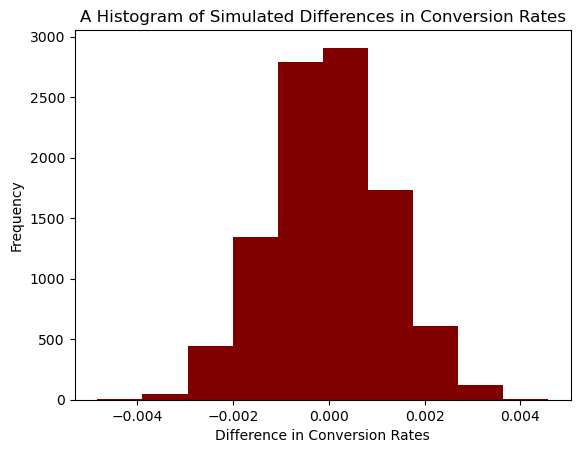

In [141]:
#  1. Developing histogram with maroon color
plt.hist(p_diffs, color='maroon')

#  2. Adding labels and title as needed
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.title('A Histogram of Simulated Differences in Conversion Rates')

# Visual time!
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

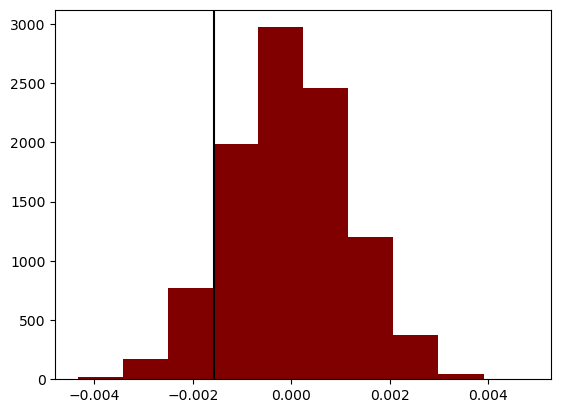

In [175]:
#  1. Creating distribution
null_values = np.random.normal(0, p_diffs.std(), p_diffs.size)

#  2. Plotting the empty values
plt.hist(null_values, color='maroon')

#  3. Adding black line for easier visibility
plt.axvline(observation_difference, c='black');

#  4. Visual time!
plt.show()

In [176]:
#  5. Calculating
(null_values > observation_difference).mean()

#  6. Print
print(f"The proportion of `p_diffs` greater than the actual difference observed in `a")

0.9027

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

###### My obersvations and thoughts:
Well, in step j. I calculated the `p-value`, which I suppose could be described as a key idea or concept in hypothesis testing (specifically in statistical inference and scientific research). It's essentially used to determine the statistical importance of an observed impact or difference between groups. In this case, a *high* `p-value` suggests that I do not have sufficient evidence to conclude that the new page is better than the old page in terms of conversion rates, but more on this in a bit.

Having said that, in my analysis I calculated the `p-value` to be appoximately **0.9027** which is larger than the typical **0.05** value (commonly used in hypothesis testing).

We now have proof that the observed difference in conversion rates between the old and new pages may have been the result of pure randomness. In other words, there is weak statistical support for the claim that the new page has a considerably higher conversion rate than the previous one.

Therefore, we shouldn't reject the null hypothesis based on our `p-value` calculations. After all of this work, there isn't clear statistical proof that the new page performs better than the old page in terms of conversion rates. Any reported changes may not actually reflect an effect but rather be the result of random variability.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [180]:
import statsmodels.api as sm

#  1. Calculating
convert_old = df2.query('(converted == 1) and (group == "control")').shape[0]
convert_new = df2.query('(converted == 1) and (group == "treatment")').shape[0]

n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

(convert_old,convert_new, n_old, n_new)

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [184]:
#  1. Using the new function
z_stat , p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')

#  2. Calling variables
z_stat, p_value

(1.3109241984234394, 0.09494168724097551)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

###### My observations and thoughts:
Given that the `z-score` is smaller than the critical value at the **95%** confidence interval and the lower P-value, I can see that the old page seems to have converted more users than the new one.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

###### My observations and thoughts:
We should use **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [237]:
#  1. Creating dummy variables from the original 'group' column
dummies = pd.get_dummies(df['group'])

#  2. Create 'ab_page' and 'intercept' columns
df2['ab_page'] = dummies['treatment']
df2['intercept'] = 1

#  3. Check the updated DataFrame
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,False
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,False
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,True
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,True
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,False


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [282]:
#  4. Changing the 'ab_page' column to integers
df2['ab_page'] = df2['ab_page'].astype(int)

#  5. Fitting to model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [241]:
#  6. Displaying the model summary
print(results.summary2())

                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-09-10 19:36 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.18988    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

###### My observations and thoughts:
Our null and alternative hypothesis models presupposed that there is an equal probability of the old and new page converting viewers, which is why the `p-value` found in the logistic regression model **(0.1899)** *differs* from what we discovered in Parts j and k **(0.905)**. This is not true in the logistic regression model. The computation done in Part II is a one-tailed test, but the Logistic Regression completed is a two-tailed test. The 'ab_page''s' p-value is **0.1899**, which is extremely close to the number from Part II. However, because it exceeds the Type I error rate of **0.05**, which is the same result as in the preceding section, we are unable to reject the null hypothesis. It's significant to point out that Part II and the logistic regression model differ in that Part II was a one-sided test whereas the logistic regression model was a two-sided test.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

###### My observations and thoughts:
Our regression model's other variables can be taken into account to provide a fuller picture of what affects an individual's likelihood to convert. Age, for instance, could be a factor because older users could have different aesthetic and content preferences than younger ones. We may be able to make better selections if we take into account additional criteria like age, gender, location, or marital status.

However, it's important to recognize both the benefits and drawbacks of incorporating extra variables into the regression model. On the plus side, if the variables are not highly correlated, adding additional variables can result in a model that is more accurate. It can increase the model's capacity for prediction and its ability to fit the data.

On the other hand, there can be disadvantages. The complexity and interpretability of the model may increase when there are more terms added to it. Consider this, when the model grows excessively complex and results in poor generalization to new data, overfitting becomes a problem.

In conclusion, adding more variables can deepen our research, but it's important to find a balance to prevent overcomplicating or overfitting the model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [254]:
#  1. Load dataset
df_countries = pd.read_csv('countries.csv')

#  2. Check it out
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [255]:
df3 = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1


In [257]:
#  3. Checking for values 
df3['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [258]:
#  4. Creating dummy variables for country column
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])

#  5. Reviewing results
df3.head()

,country,timestamp,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,False,True,False
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1,False,False,True
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1,False,True,False
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0,False,True,False
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1,False,True,False


In [270]:
#  6. Checking data types
df3.dtypes

country         object
timestamp       object
landing_page    object
converted        int64
intercept        int64
ab_page          int32
CA               int32
UK               int32
US               int32
dtype: object

In [271]:
#  7. Converting columns to integers
df3['CA'] = df3['CA'].astype(int)
df3['UK'] = df3['UK'].astype(int)
df3['US'] = df3['US'].astype(int)

#  8. Fit a logistic regression model
log_mod200 = sm.Logit(df3['converted'], df3[['intercept', 'CA', 'UK']])
results2 = log_mod200.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [272]:
#  9. Showing summary of the results
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-09-10 20:20 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19835    
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

###### My observations and thoughts:
The `p-values` for the nations are more than **0.05**, indicating that the outcome is unimportant. In other words, no difference in conversion rate according to country was seen.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [276]:
#  1. Creating new columns to solve country conversion rate
df3['ca_conversion'] = df3['CA'] * df3['ab_page']
df3['uk_conversion'] = df3['UK'] * df3['ab_page']
df3.head()

,country,timestamp,landing_page,converted,intercept,ab_page,CA,UK,US,ca_conversion,uk_conversion
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1,0,1,0,0,1


In [278]:
#  2. Fitting model
df3['intercept'] = 1
log_mod200 = sm.Logit(df3['converted'],df3[['intercept','ab_page','UK','CA','uk_conversion','ca_conversion']])
results2 = log_mod200.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [280]:
#  3. Showing summary
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2023-09-10 20:26 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           LLR p-value:      0.19199    
No. Iterations:     6.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page          -0.0206   0.0137   -1.5052 0.1323 -0.0473  0.0062
UK               -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
CA               -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
uk_conversion     0.0314   0.0266    1.1807 0.2377 -0.0207  0.0835
ca_conversion    -0.0469   0.0538   -0.8718 0.3833 -0.1523  0.0585
==================================================================

"""

###### My observations and thoughts:
The results are not significant because the p-values for the countries using the conversion are higher than 0.05. Another way of putting it, the conversion rates of the countries did not change.


In [281]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1